- BoW & TF-IDF : mengubah kalimat/paragraf (lebih dari 1 kata) menjadi vektor
- Word2Vec : mengubah kata menjadi vektor

# 1. Import Library

In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize

from tqdm.auto import tqdm
from gensim.models import Word2Vec

# 2. Extract Data

In [4]:
df = pd.read_csv('/content/ojol_review.csv')
df.sample(5)

,review,rate
557,Sudah 7 hari aku gada orderan la. Ada pun orde...,1
7,Gojek emang oke Sebagai driver aku sih gak mul...,5
428,Terlalu sering update tapi tiap update jadi ma...,2
1132,"Voucher referal masih 7 hari kok ilang, ga nia...",1
280,"Apaan nih, driver nya ga ramah, minta di paksa...",1


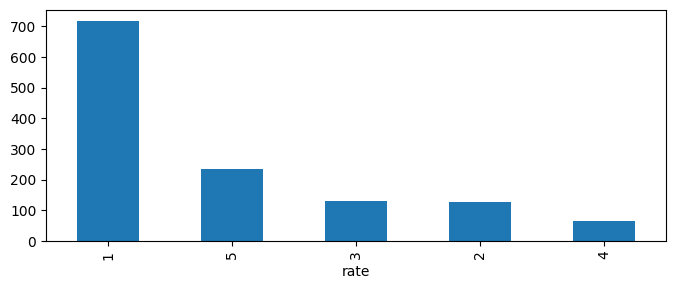

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3))
df['rate'].value_counts().plot(kind='bar');

# 3. Prepare

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
sentences = [word_tokenize(kalimat.lower()) for kalimat in tqdm(df['review'])]

  0%|          | 0/1277 [00:00<?, ?it/s]

# 4. Word Embedding

In [17]:
w2v_model = Word2Vec(sentences,vector_size=200,window=5)

# 5. Check Model

In [18]:
w2v = w2v_model.wv

In [21]:
## check vocab
# w2v.index_to_key

In [23]:
## check vector
w2v.vectors.shape

(1121, 200)

In [28]:
## check vector dari suatu kata
w2v["ojol"]

array([-2.22686399e-02,  2.21104678e-02,  1.39469700e-02,  8.92423019e-02,
        1.24146663e-01, -1.01575673e-01,  2.40311027e-02,  1.65686369e-01,
       -1.32905811e-01,  1.14059485e-01, -8.27816576e-02, -1.33636281e-01,
        2.39495747e-02,  1.16851829e-01, -1.99723113e-02, -1.14159368e-01,
       -1.05908699e-02,  6.47757128e-02, -6.96103508e-03, -2.50230551e-01,
        6.95318431e-02, -4.69758399e-02,  4.51997407e-02,  1.75341405e-02,
        3.82691175e-02, -8.95250589e-02,  5.31369401e-03, -8.52290392e-02,
       -1.24947958e-01,  2.28723604e-02,  1.20303817e-01,  2.01592371e-02,
        6.38292432e-02,  3.56278359e-03, -1.82078723e-02,  3.79955992e-02,
        8.64658505e-02,  3.80270253e-03, -7.57141337e-02, -1.78190261e-01,
       -9.79199633e-02,  6.82204366e-02,  1.80122312e-02,  6.39798045e-02,
        2.18135178e-01, -5.37348427e-02,  5.94976172e-03, -5.54807298e-02,
        6.32785708e-02,  9.28422958e-02,  8.35325494e-02, -3.95617299e-02,
       -7.46729150e-02, -

# 6. Visualisasi Dimensi Tinggi

In [ ]:
!pip install umap-learn
from umap import UMAP

In [34]:
X = UMAP().fit_transform(w2v.vectors)

In [36]:
df = pd.DataFrame(X, columns=["umap1","umap2"])
df['teks'] = w2v.index_to_key
df.head()

,umap1,umap2,teks
0,-3.587968,19.026291,","
1,-3.582122,19.537952,.
2,-3.443252,16.898613,saya
3,-2.557939,13.268842,!
4,-3.602127,18.911154,di


In [39]:
import plotly.express as px
fig = px.scatter(df,x="umap1",y="umap2",text="teks")
fig.update_traces(textposition = 'top center')
fig.update_layout(height=800,title_text="Word2Vec Visualization in 2 Dimension by UMAP")
fig.show()

# 7. Check Similar Word

In [40]:
w2v.similar_by_word("ojek",topn=5)

[('sy', 0.9991005063056946),
 ('trus', 0.9990974068641663),
 ('gojek', 0.9990957379341125),
 ('tetap', 0.9990595579147339),
 ('semua', 0.9990509152412415)]